ValueError: shapes (784,) and (2,) not aligned: 784 (dim 0) != 2 (dim 0)

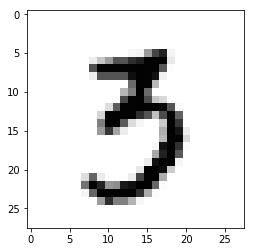

In [40]:
import numpy as np
import csv
import matplotlib.pyplot as plt

#activation fucntion
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

#cross_entropy
def compute_loss(Y, Y_hat):
    L = ((-1) * np.sum( np.dot(np.log(Y_hat),Y) ) + np.sum( np.dot(np.log(1-Y_hat),(1-Y)) ) )
    return L

#error
def error(d,y,derive=False):
    if derive == True:
        return (y-d)
    return 0.5 * (d-y)*(d-y)

#importing csv files
x1_train = np.genfromtxt ('Part2_1_Train.csv', delimiter=",")
x3_train = np.genfromtxt ('Part2_3_Train.csv', delimiter=",")
x1_test = np.genfromtxt ('Part2_1_Test.csv', delimiter=",")
x3_test = np.genfromtxt ('Part2_3_Test.csv', delimiter=",")


#labels
Y1 = 1
Y3 = np.array([0,1])

#flattening

#initialize weights
w1 = np.random.normal(-1,1,(28,28))
w2 = np.random.normal(0,1,(28,28))
w13 = np.random.normal(-1,1,(28,28))
w23 = np.random.normal(0,1,(28,28))
wo1 = np.random.normal(1,0,(784,))
wo2 = np.random.normal(0,1,(784,))


#creating 28x28 filters
for i in range(17):
    X1_train = x1_train[i].reshape((28,28)).T
    plt.imshow((X1_train), cmap="Greys")
    X1_test = x1_test[i].reshape((28,28)).T
    plt.imshow((X1_test), cmap="Greys")
    
    X3_train = x3_train[i].reshape((28,28)).T
    plt.imshow((X3_train), cmap="Greys")
    X3_test = x3_test[i].reshape((28,28)).T
    plt.imshow((X3_test), cmap="Greys")
    

#class 1
#building and training
X = X1_train
Xt = X1_test
X3 = X3_train
X3t = X3_test
Y = Y1
Y3 = Y3
lr3 = 0.5
lr = 1 #learning rate

for i in range(10):
    #forwardfeed for X1_train    
    Z1 = np.dot(w1, X) #filter1
    A1 = sigmoid(Z1) #perception 1
    Z2 = np.dot(w2, X) #filter2
    A2 = sigmoid(Z2) #perceptron 2
    
    #flatten the 28x28 filter
    A11 = A1.flatten()
    A22 = A2.flatten()  
    Z_1 = [A11, A22]
    #output
    OO1 = np.dot(Z_1,wo1)
    O1 = sigmoid(OO1)

    #backprop
    error1 = error(Y, O1)
    Err1 = error1.flatten()

    #output
    dO1 = error1 * O1
  

    #hidden layers
    dW1 = np.dot(sigmoid(A11), error1, wo1)
    dW2 = np.dot(sigmoid(A22), error1, wo2)

    #forming 28x28
    dw1 = dW1.reshape(28,28)
    dw2 = dW2.reshape(28,28)

    #update the weights
    O1 = O1 - (lr*dO1)
    O2 = O2 - (lr*dO2)
    w1 = w1 - (lr*dw1)
    w2 = w2 - (lr*dw2)
    
    #class1 output
    C1 = [O1, O2]

    #forwardfeed to X_test
    Z1t = np.dot(w1, Xt) #filter1
    A1t = sigmoid(Z1t) #perception 1
    Z2t = np.dot(w2, Xt) #filter2
    A2t = sigmoid(Z2t) #perceptron 2
    
    #flatten the 28x28 filter
    A11t = A1t.flatten()
    A22t = A2t.flatten()    
    #output
    OO1t = np.dot(A11t,wo1)
    O1t  = sigmoid(OO1t)
    OO2t = np.dot(A22t,wo2)
    O2t  = np.argmin(sigmoid(OO2t))

    #error between train and test
    C1t = [O1t, O2t]
    
    #error plot
    err[i] = 0 
    err[i] += (0.5) * np.power((C1[i], C1t[i]), 2)

    #class2
    #forwardfeed for X2_train    
    Z13 = np.dot(w13, X3) #filter1
    A13 = sigmoid(Z13) #perception 1
    Z23 = np.dot(w23, X3) #filter2
    A23 = sigmoid(Z23) #perceptron 2
    
    #flatten the 28x28 filter
    A31 = A13.flatten()
    A32 = A23.flatten()    
    #output
    OO13 = np.dot(A31,wo1)
    O13 = sigmoid(OO13)
    OO23 = np.dot(A32,wo2)
    O23  = np.argmin(sigmoid(OO23)) 


    #backprop
    error13 = error(Y3[0], O13)
    error23 = error(Y3[1], O23)

    #output
    dO13 = error13 * O13
    dO23 = error23 * O23

    #hidden layers
    dW13 = np.dot(sigmoid(A31), error13, wo1)
    dW23 = np.dot(sigmoid(A32), error23, wo2)

    #forming 28x28
    dw13 = dW13.reshape(28,28)
    dw23 = dW23.reshape(28,28)

    #update the weights
    O13 = O13 - (lr3*dO13)
    O23 = O23 - (lr3*dO23)
    w13 = w13 - (lr3*dw13)
    w23 = w23 - (lr3*dw23)

    #forwardfeed to X_test
    Z13t = np.dot(w1, X3t) #filter1
    A13t = sigmoid(Z13t) #perception 1
    Z23t = np.dot(w2, X3t) #filter2
    A23t = sigmoid(Z23t) #perceptron 2
    
    #flatten the 28x28 filter
    A31t = A13t.flatten()
    A32t = A23t.flatten()    
    #output
    OO13t = np.dot(A31t,wo1)
    O13t  = sigmoid(OO13t)
    OO23t = np.dot(A32t,wo2)
    O23t  = np.argmin(sigmoid(OO23t))

    #error between train and test
    error_13 = error(O13t, O13)
    error_23 = error(O23t, O23)




       
 
